# Overview of scope

My plan is to use this project as an exlporatory analysis to create functions and models that I will use in an R shiny application from which to conduct exploratory analysis and perform various forecasting techniques on any given stock to help inform option trading. In order to do this I will need generalized functions for obtaining and cleaning historical stock price data along with other associated stock/company data.

## Obtaining stock data

I will obtain the all the available daily Open High Low Close (OHCL) price data for a given stock symbol in python using the [yfinance](https://pypi.org/project/yfinance/) library. This library not only provides OHCL data but lots of other useful data I may want to see in the R shiny app.

## Cleaning the data

I will impute any missing values using the [pandas](https://pandas.pydata.org/docs/index.html) DataFrame method [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html) with the method set to time in order to calculate the average for missing value(s) between time intervals.

## Exponential Weighted Moving Average

I will also compute the 12, 26, 50, and 200 day Exponential Weighted Moving Average (EWMA) using the pandas [ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) method in conjunction with the mean method.

## Nvidia as a test case

Finally, I will use data from [Nvidia](https://www.nvidia.com/en-us/) (NVDA) as my data to continue building out the functionality for the R shiny app.

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def get_stonk(symbol):
    stonk = yf.Ticker(symbol)

    if(stonk.info["regularMarketPrice"] == None):
        return False

    # Daily OHCL, volume, market cap
    data = stonk.history(period='max', interval='1d')

    # Infer any missing values
    data = data.interpolate(method='time')

    stonk_data = {
        "info": stonk.info,
        "ewma": {
            "12": data['Close'].ewm(span=12, adjust=False).mean(),
            "26": data['Close'].ewm(span=26, adjust=False).mean(),
            "50": data['Close'].ewm(span=50, adjust=False).mean(),
            "200": data['Close'].ewm(span=200, adjust=False).mean()
        },
        "data": data.iloc[:, 0:5]
    }

    return stonk_data

nvda = get_stonk("NVDA")
nvda

{'info': {'zip': '95051',
  'sector': 'Technology',
  'fullTimeEmployees': 22473,
  'longBusinessSummary': "NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; cryptocurrency mining processors; Jetson for robotics and other embedded platforms; and

From the output above we can see that the function sucessfully has gathered the fundamental data needed for the R shiny app into a single dictionary.

Let's plot the closing data along with the 200 day EWMA.

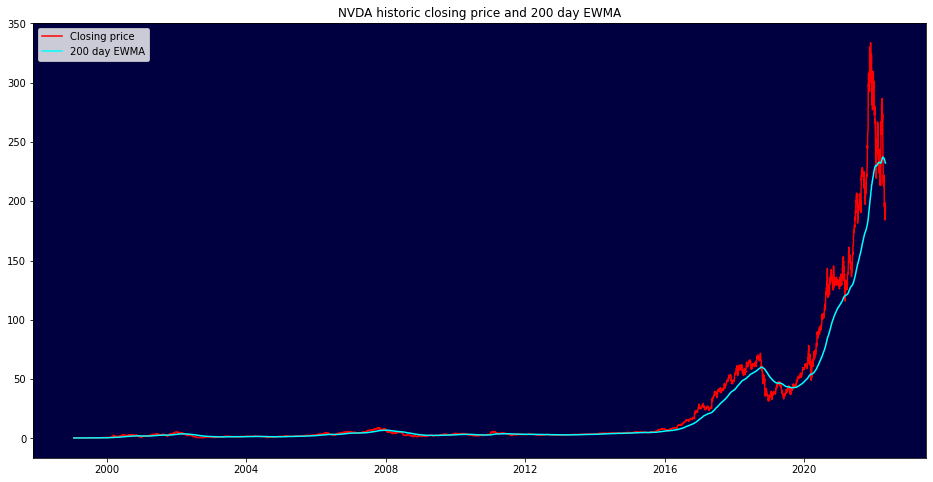

In [3]:
def plot_price(close, ewma, title):
        # Visualize
    fig, ax = plt.subplots(figsize=(16,8))
    ax.set_facecolor('#000041')
    plt.plot(close, color='red', label='Closing price')
    plt.plot(ewma, color='cyan', label='200 day EWMA')
    plt.legend()
    plt.title(title)
    plt.show()

plot_price(nvda["data"]["Close"], nvda["ewma"]["200"], "NVDA historic closing price and 200 day EWMA")

Great. Our 200 day EWMA stays well below spikes in price like we would expect.

I will import this function into R for further reports using the [reticulate R package](https://rstudio.github.io/reticulate/).

Please see the [NVDA analysis report](./nvda_analysis.html) for more.